In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import RegexpTokenizer as rt
from stop_words import get_stop_words
import re

sns.set()

In [2]:
topics = pd.read_csv('/Users/tonleon/Desktop/mallet-2.0.8/topics_in_docs_15.csv', header=None, index_col=None, sep = '\t' )

In [3]:
topics

0                                                  1         2         3   \
0    0  file:/Users/tonleon/Desktop/mallet-2.0.8/Estaf...  0.004055  0.000301   
1    1  file:/Users/tonleon/Desktop/mallet-2.0.8/Estaf...  0.000153  0.000281   
2    2  file:/Users/tonleon/Desktop/mallet-2.0.8/Estaf...  0.000300  0.007696   
3    3  file:/Users/tonleon/Desktop/mallet-2.0.8/Estaf...  0.000403  0.000739   
4    4  file:/Users/tonleon/Desktop/mallet-2.0.8/Estaf...  0.000366  0.205047   
..  ..                                                ...       ...       ...   
89  89  file:/Users/tonleon/Desktop/mallet-2.0.8/Estaf...  0.000935  0.012833   
90  90  file:/Users/tonleon/Desktop/mallet-2.0.8/Estaf...  0.000448  0.000822   
91  91  file:/Users/tonleon/Desktop/mallet-2.0.8/Estaf...  0.000568  0.001044   
92  92  file:/Users/tonleon/Desktop/mallet-2.0.8/Estaf...  0.000427  0.000785   
93  93  file:/Users/tonleon/Desktop/mallet-2.0.8/Estaf...  0.171846  0.001059   

          4         5         6         7         8         9         10  \
0   0.000235  0.107466  0.000265  0.000244  0.028023  0.028746  0.012932   
1   0.158699  0.450361  0.000249  0.022087  0.000734  0.230932  0.028502   
2   0.004003  0.175856  0.000487  0.000447  0.015727  0.063488  0.005881   
3   0.000578  0.307386  0.005438  0.000599  0.102422  0.013277  0.376355   
4   0.000525  0.509783  0.078865  0.013590  0.010450  0.038155  0.011508   
..       ...       ...       ...       ...       ...       ...       ...   
89  0.001341  0.135982  0.001516  0.001392  0.004480  0.019724  0.129451   
90  0.000642  0.368328  0.000726  0.000666  0.188345  0.046681  0.099200   
91  0.000816  0.413831  0.000922  0.000847  0.002724  0.093091  0.322004   
92  0.000613  0.260113  0.000693  0.000636  0.078201  0.064856  0.130206   
93  0.000827  0.426352  0.000935  0.000858  0.016463  0.032709  0.066086   

          11        12        13        14        15        16  
0   0.000263  0.812128  0.000546  0.000150  0.000310  0.004335  
1   0.000246  0.026247  0.000512  0.000141  0.073154  0.007702  
2   0.000483  0.622957  0.076012  0.003848  0.022001  0.000814  
3   0.000647  0.174230  0.001344  0.000370  0.015119  0.001091  
4   0.009284  0.001777  0.001221  0.000336  0.000694  0.118399  
..       ...       ...       ...       ...       ...       ...  
89  0.001502  0.660325  0.003122  0.000859  0.024003  0.002534  
90  0.000719  0.230936  0.001494  0.058931  0.000848  0.001213  
91  0.000913  0.131167  0.008656  0.000522  0.007836  0.015057  
92  0.000686  0.453923  0.006503  0.000392  0.000810  0.001158  
93  0.000926  0.002800  0.084134  0.103291  0.021645  0.070070  

[94 rows x 17 columns]

In [4]:
topics = topics.drop([23])
topics = topics.drop(0, axis = 1)

In [5]:
topics[1] = topics[1].apply(lambda x: int(x[-16: -13]))

In [6]:
topics = topics.rename(columns = {1: 'Issue'})
topics = topics.rename(columns = {i + 1 : i for i in range(1, 16)})
topics = topics.sort_values(by=['Issue'])
topics

Issue         1         2         3         4         5         6  \
35      3  0.001380  0.002535  0.001979  0.233466  0.002238  0.002055   
38      4  0.000707  0.001299  0.001014  0.430652  0.001147  0.001053   
9       5  0.000990  0.001819  0.001420  0.355827  0.013375  0.001474   
73      6  0.001451  0.002666  0.002082  0.400804  0.019604  0.019412   
88      7  0.002716  0.004990  0.003897  0.136724  0.004405  0.004045   
..    ...       ...       ...       ...       ...       ...       ...   
69    163  0.000308  0.022547  0.000442  0.550371  0.000500  0.004122   
15    167  0.000554  0.001017  0.000794  0.363457  0.000898  0.000824   
86    170  0.001093  0.002008  0.001568  0.561710  0.001773  0.144542   
11    172  0.007801  0.015504  0.008064  0.354282  0.000982  0.036881   
13    175  0.001477  0.002713  0.019672  0.337626  0.002395  0.160180   

           7         8         9        10        11        12        13  \
35  0.482264  0.029106  0.174623  0.002216  0.006703  0.053812  0.001267   
38  0.406855  0.098972  0.013840  0.017947  0.003435  0.002361  0.000649   
9   0.357814  0.056192  0.007609  0.036897  0.110731  0.050382  0.000909   
73  0.334715  0.030612  0.011154  0.002331  0.041552  0.004845  0.035834   
88  0.335920  0.057302  0.117749  0.004363  0.271521  0.041360  0.002495   
..       ...       ...       ...       ...       ...       ...       ...   
69  0.001477  0.028482  0.075637  0.000495  0.012488  0.004692  0.000283   
15  0.022393  0.064320  0.023995  0.415448  0.101394  0.001848  0.000508   
86  0.044214  0.088017  0.008400  0.001756  0.005310  0.003649  0.052973   
11  0.002901  0.041553  0.155766  0.000972  0.312363  0.030805  0.000556   
13  0.007076  0.031150  0.028903  0.002372  0.340689  0.040037  0.018910   

          14        15  
35  0.002616  0.003740  
38  0.018152  0.001916  
9   0.001877  0.002683  
73  0.002751  0.090186  
88  0.005150  0.007362  
..       ...       ...  
69  0.194746  0.103411  
15  0.001049  0.001500  
86  0.041049  0.041939  
11  0.022735  0.008837  
13  0.002800  0.004002  

[93 rows x 16 columns]

# Dominant Topics - Heatmap

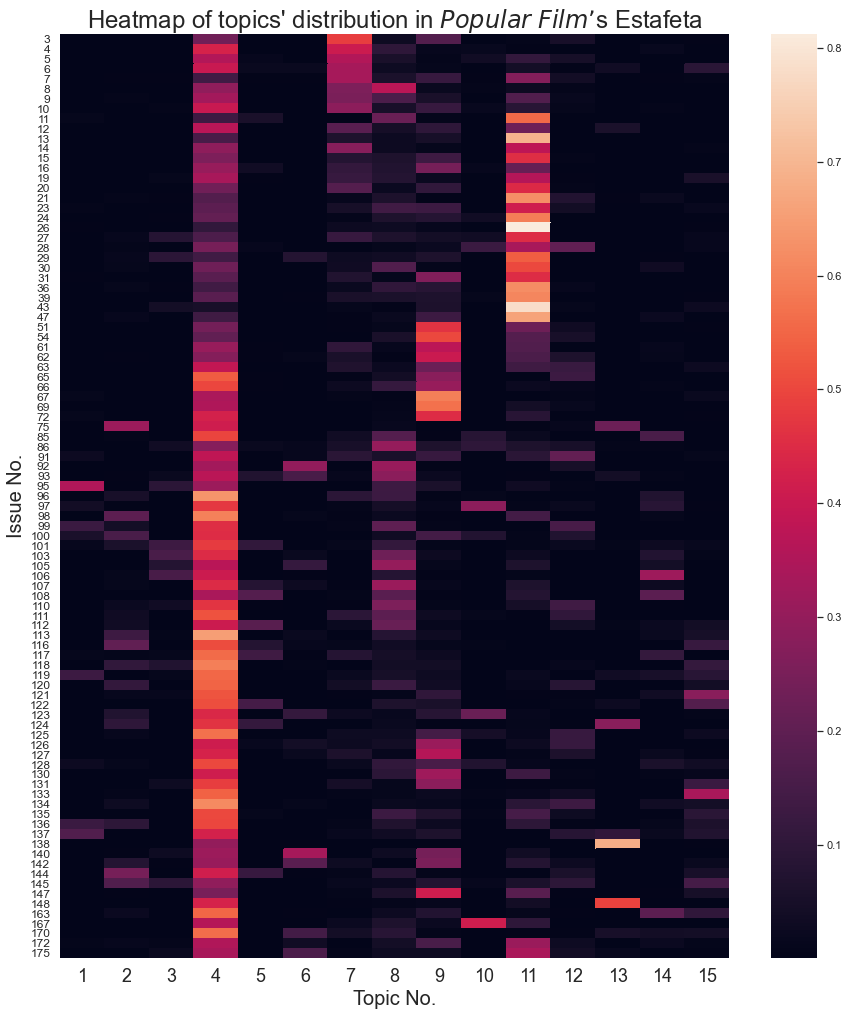

In [7]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns

plt.figure(figsize = (15,17))  
Index= [i for i in range(1, 16)]
Cols = list(topics['Issue'])

ax = sns.heatmap(topics.iloc[:, 1:], xticklabels=Index, yticklabels=Cols)
ax.set_title("Heatmap of topics' distribution in $\it{Popular}$ $\it{Film’}$s Estafeta", fontsize = 24)

plt.yticks(rotation=0, fontsize = 12)
plt.xticks(rotation=0, fontsize = 18)
plt.ylabel('Issue No.', fontsize = 20)
plt.xlabel('Topic No.', fontsize = 20)

plt.savefig('heatmap_topics.pdf', bbox_inches='tight')

In [8]:
df_melted = topics.melt(id_vars=['Issue'], value_vars=[i for i in range(1,16)], var_name='Topic', value_name='Prevelance')
df_melted

Issue Topic  Prevelance
0         3     1    0.001380
1         4     1    0.000707
2         5     1    0.000990
3         6     1    0.001451
4         7     1    0.002716
...     ...   ...         ...
1390    163    15    0.103411
1391    167    15    0.001500
1392    170    15    0.041939
1393    172    15    0.008837
1394    175    15    0.004002

[1395 rows x 3 columns]

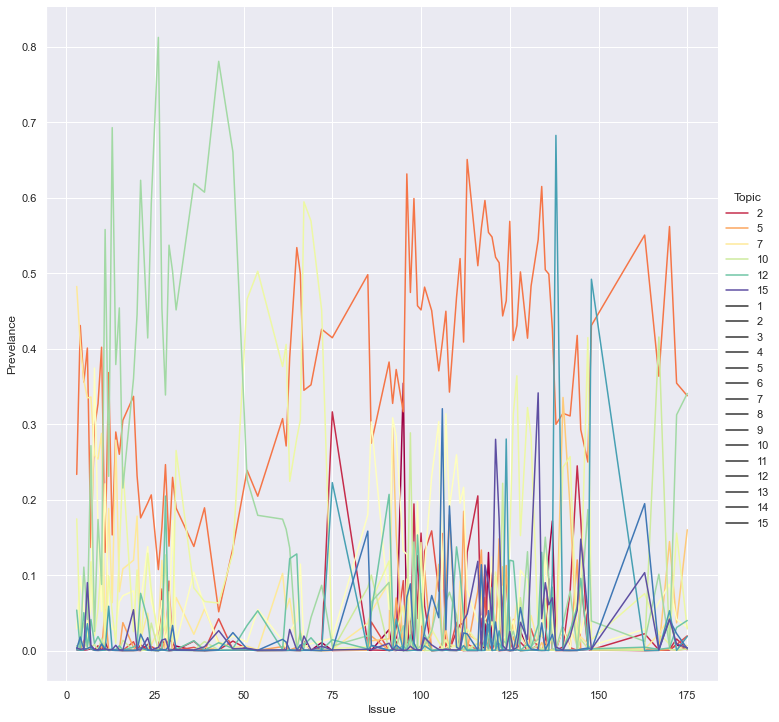

In [9]:
sns.relplot(x='Issue', y="Prevelance", hue='Topic', data=df_melted, palette='Spectral', kind="line", height=10, style="Topic", dashes=False, ci=None)

In [10]:
topics.set_index(['Issue'], inplace=True)

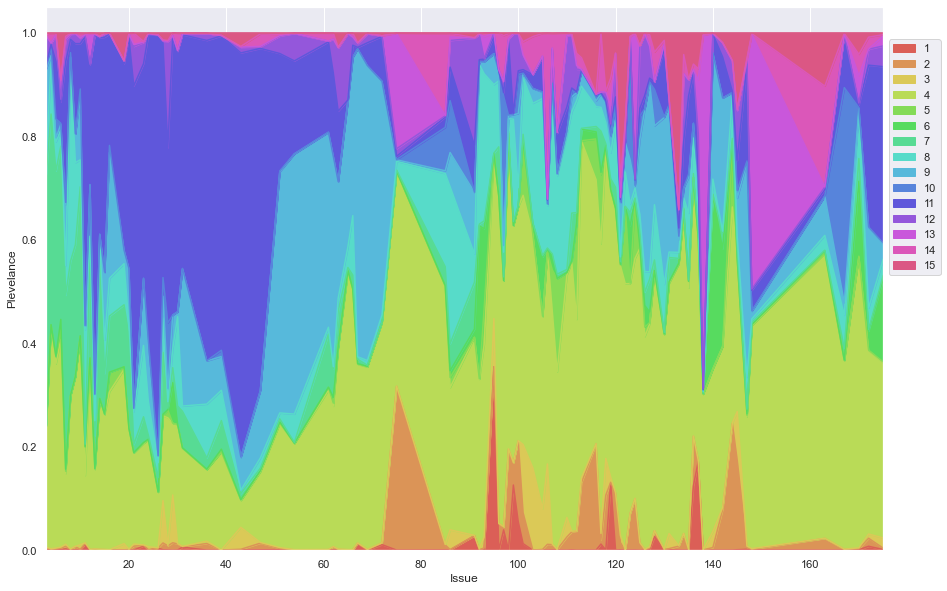

In [11]:
col = sns.color_palette("hls", 15)
plt.rcParams['figure.figsize'] = [15, 10]
topics.plot.area(color = col)
plt.ylabel('Plevelance')
plt.legend(loc='best', bbox_to_anchor=(1, 0.95))

# Word Clouds

In [56]:
from wordcloud import WordCloud
from matplotlib import rc

rc('text', usetex=True)

In [26]:
word_weights = pd.read_csv('/Users/tonleon/Desktop/mallet-2.0.8/topic_weight_15.сsv', header=None, index_col=None, sep = '\t' )

In [45]:
highest_freq = word_weights.groupby(0)[2].nlargest(100)
highest_freq

0   1682     7.064099
    102      6.064099
    865      6.064099
    2170     6.064099
    630      5.064099
               ...   
14  54008    1.064099
    54022    1.064099
    54024    1.064099
    54033    1.064099
    54045    1.064099
Name: 2, Length: 1500, dtype: float64

In [46]:
topic_0 = dict(word_weights.iloc[highest_freq[0].index][[1, 2]].values)

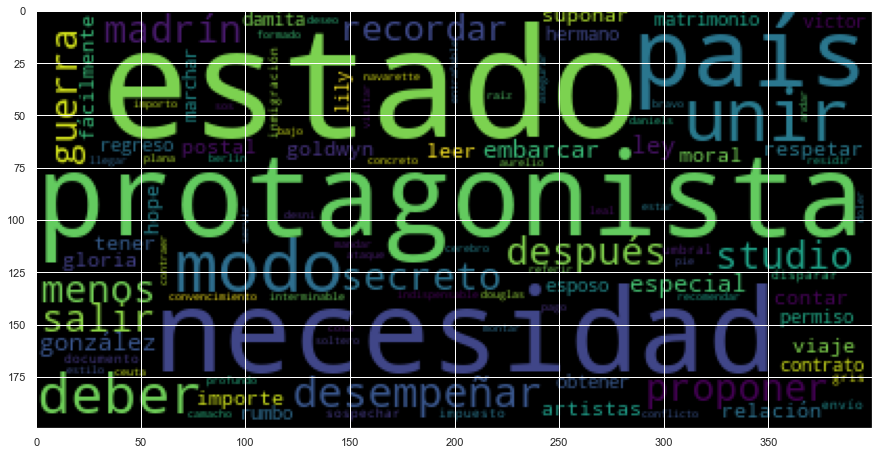

In [47]:
wordcloud = WordCloud().generate_from_frequencies(topic_0)
plt.imshow(wordcloud)

(-0.5, 2999.5, 1999.5, -0.5)

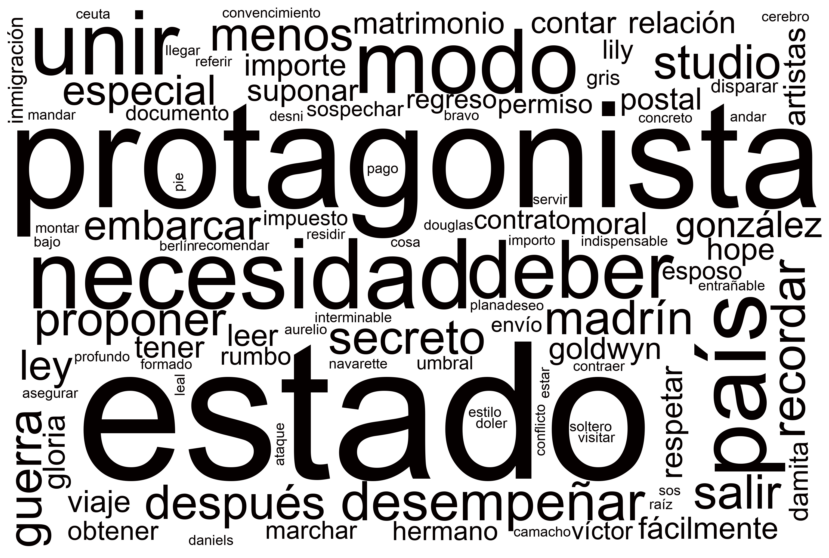

In [48]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(font_path = '/Library/Fonts/Arial Unicode.ttf', 
                      background_color="white", 
                      width=3000, height=2000, 
                      max_words=500).generate_from_frequencies(dict(word_weights.iloc[highest_freq[0].index][[1, 2]].values))
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
# plt.savefig('biden_wc.png')

In [49]:
filenames = ['topic_1', 'topic_2', 'topic_3', 'topic_4','topic_5',
            'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10',
            'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15']

def word_cloud(data, filenames):
    def black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        return("hsl(0,100%, 1%)")
    columns  = list(data)

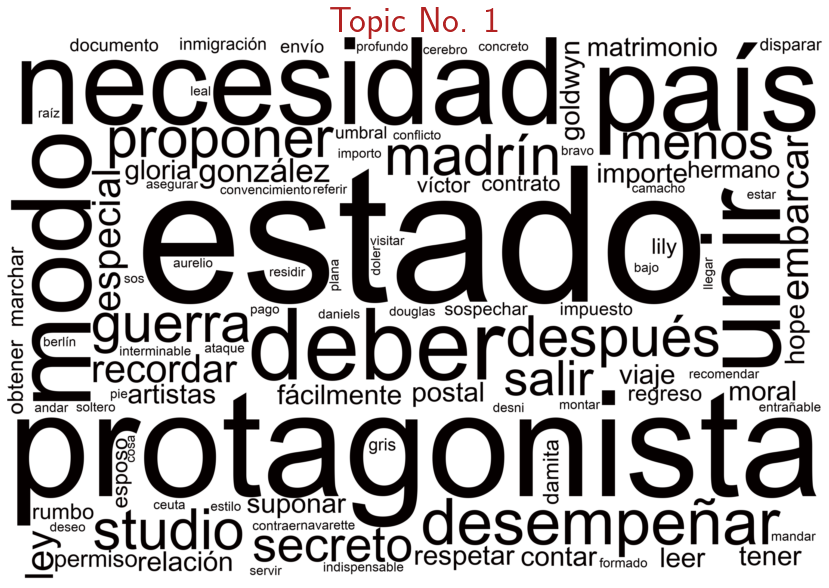

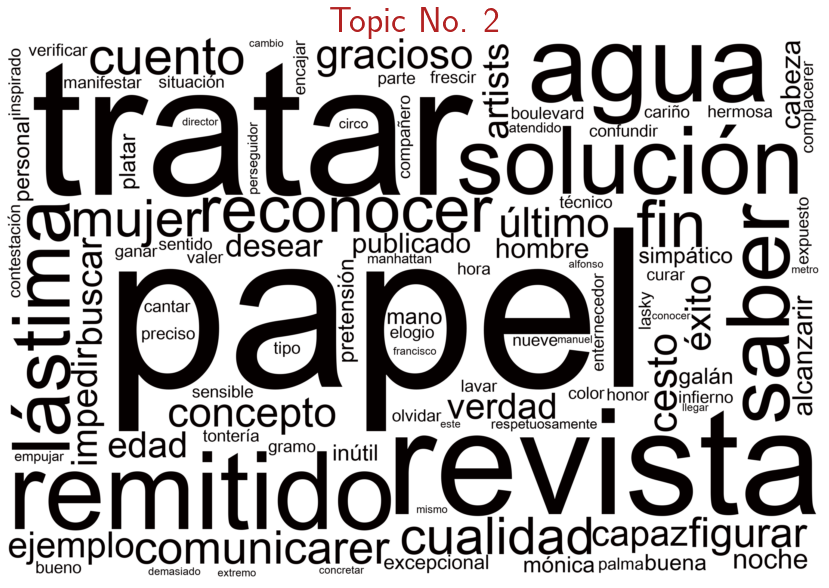

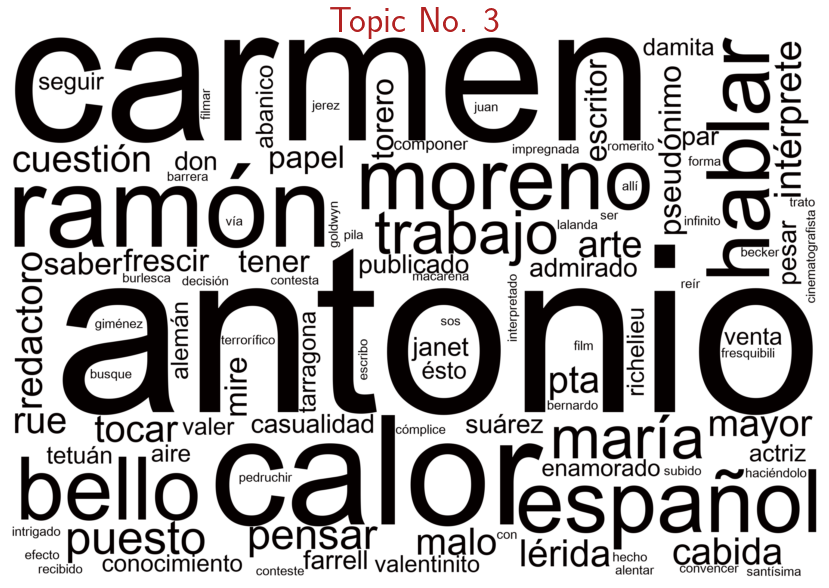

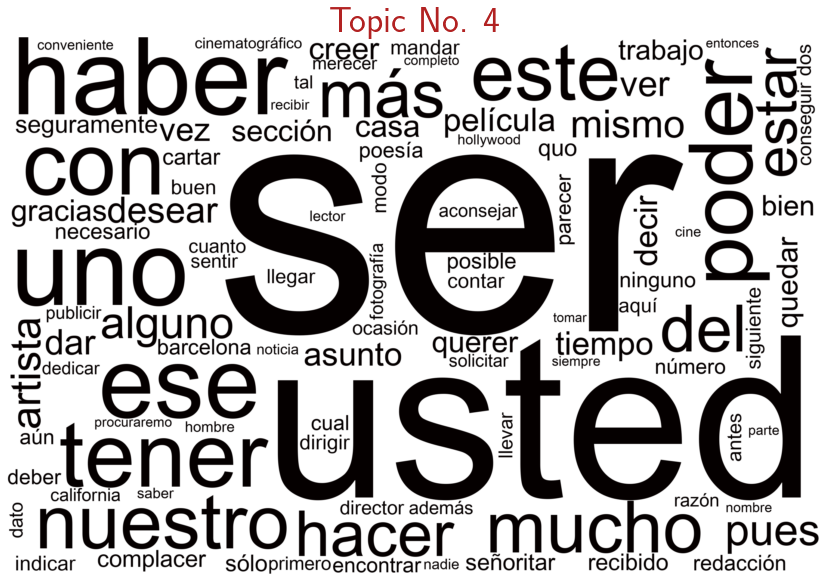

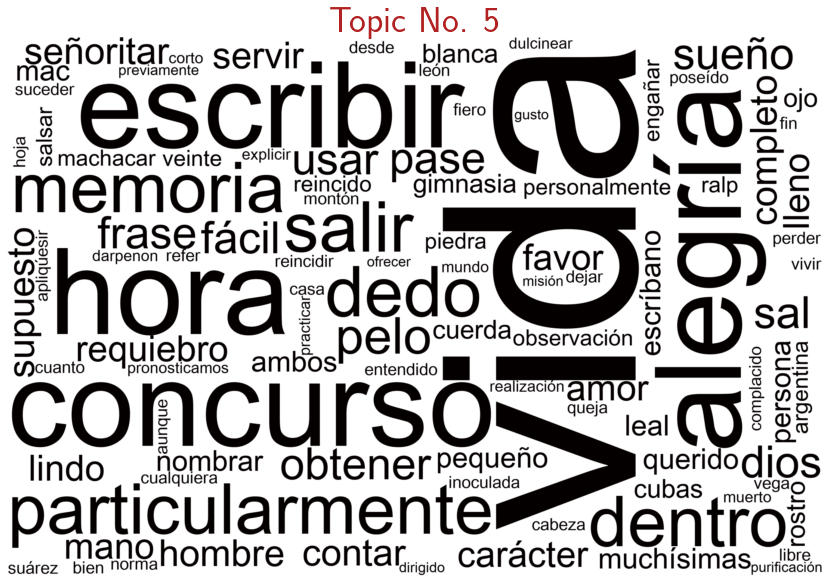

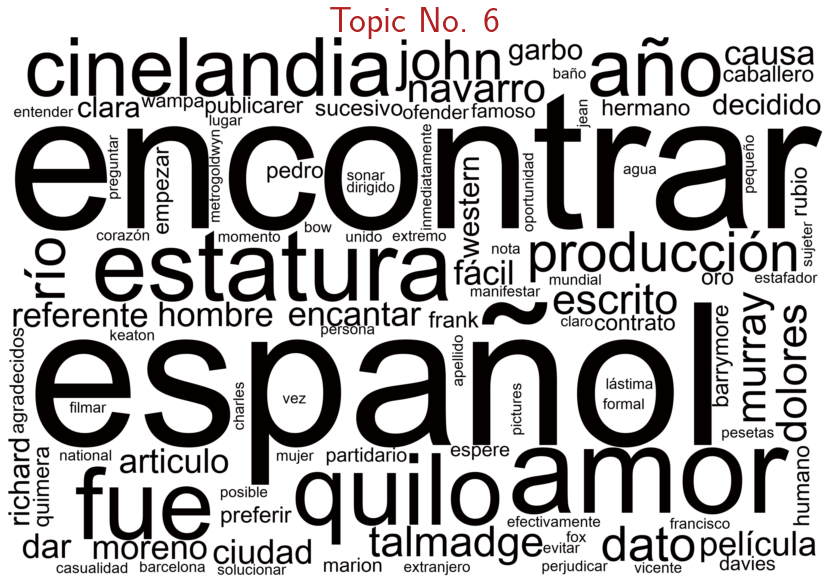

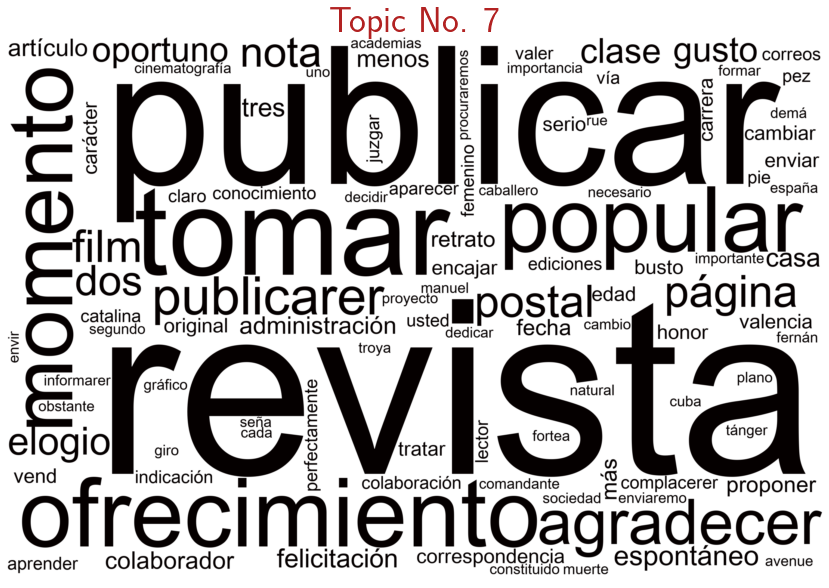

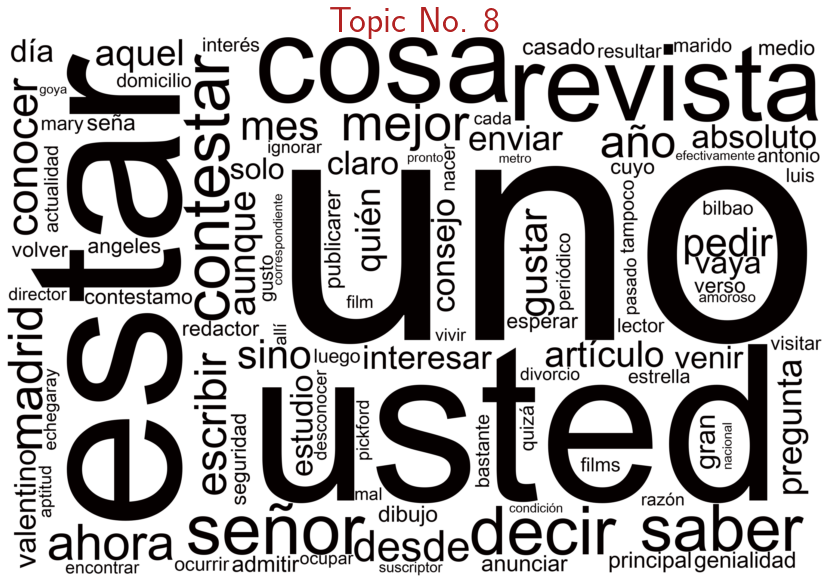

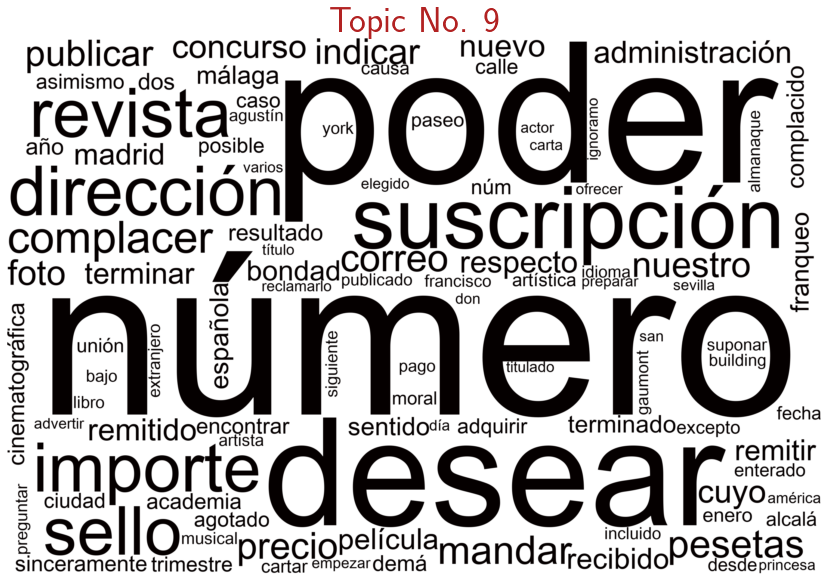

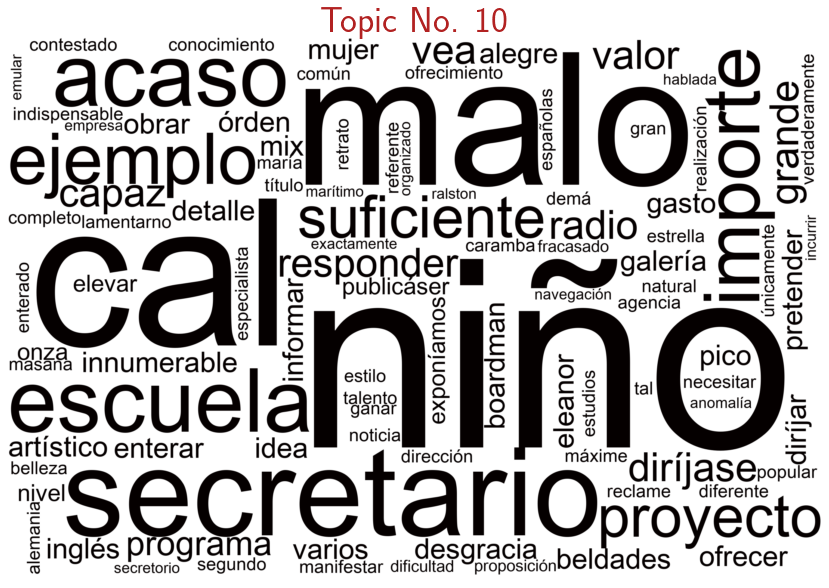

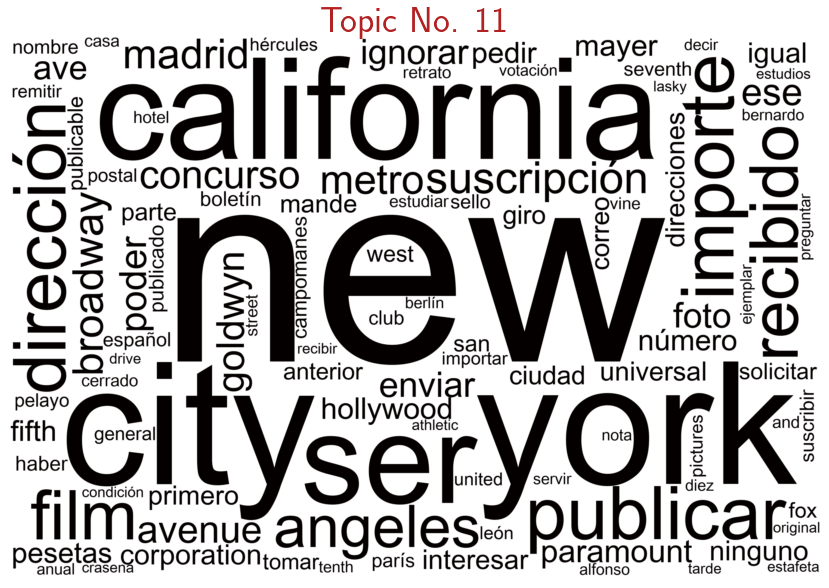

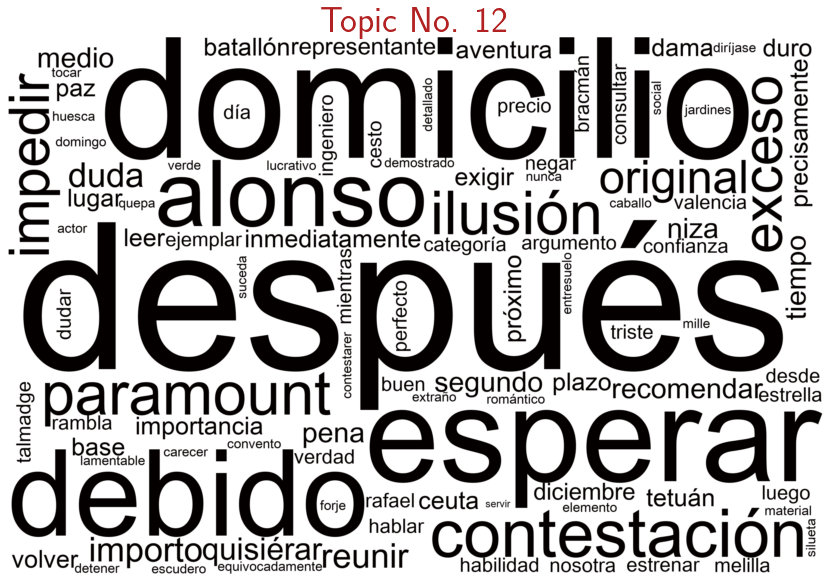

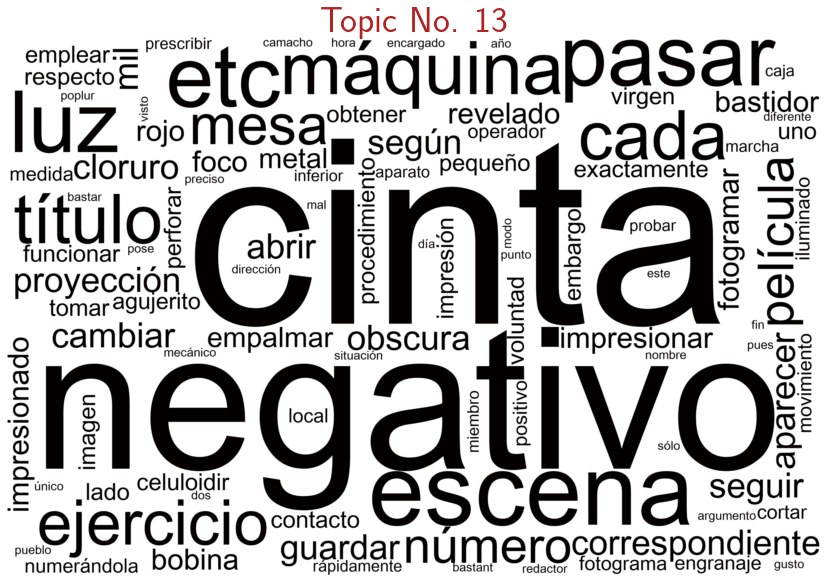

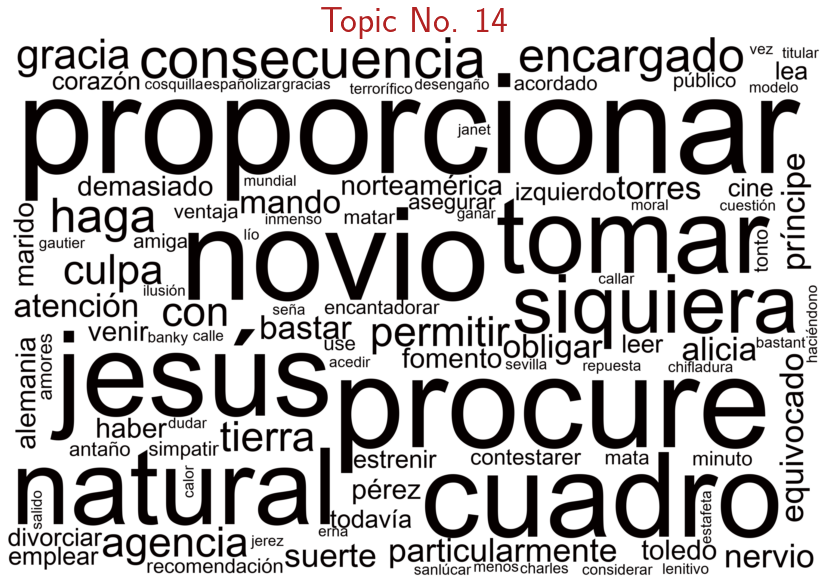

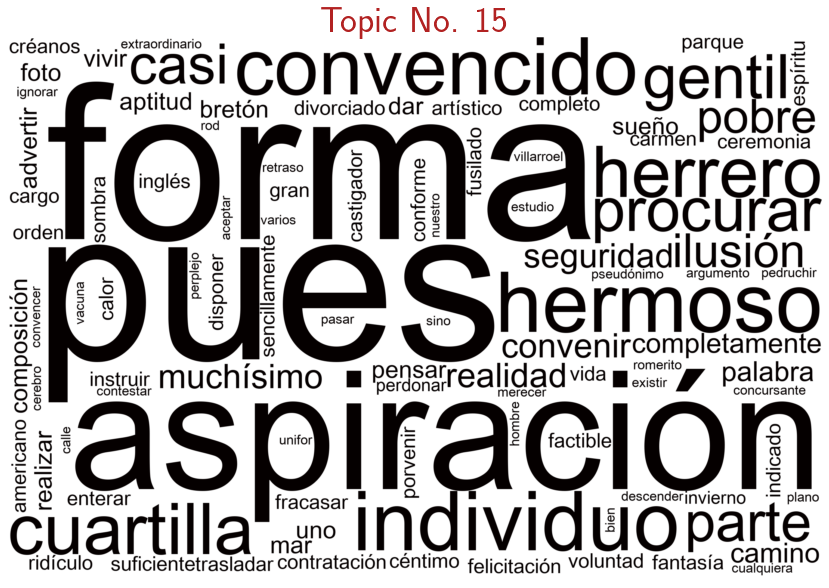

In [60]:
for i in range(15):
        wordcloud = WordCloud(font_path = '/Library/Fonts/Arial Unicode.ttf', 
                              background_color="white", width=3000, 
                              height=2000, 
                              max_words=500).generate_from_frequencies(dict(word_weights.iloc[highest_freq[i].index][[1, 2]].values))
        wordcloud.recolor(color_func = black_color_func)
        plt.figure(figsize=[15,10])
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title('Topic No. {}'.format(i+1), fontsize = 36, color='firebrick')
        plt.savefig('/Users/tonleon/Desktop/Spanish Films DH/Visualization/{}.png'.format(filenames[i]))
# # plot the wordcloud
# plt.imshow(wordcloud, interpolation="bilinear")
# # remove plot axes
# plt.axis("off")
# # save the image
# plt.savefig('biden_wc.png')